# Measures, values and relationships (30pt)

In [1]:
# Import packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
os.getcwd()

'/home/jovyan/PS'

    1. (3pt) Consider all variables in data. List their measure type (nominar/ordinal/inter-val/ratio).

In [2]:
# Load the dataset for examination
states_data = pd.read_csv('/home/jovyan/PS/data/states.csv', sep='\t')
states_data.head(5)

,Population,Income,Illiteracy,LifeExp,Murder,HSGrad,Frost,Area
0,3615,3624,2.1,69.05,15.1,41.3,20,50708
1,365,6315,1.5,69.31,11.3,66.7,152,566432
2,2212,4530,1.8,70.55,7.8,58.1,15,113417
3,2110,3378,1.9,70.66,10.1,39.9,65,51945
4,21198,5114,1.1,71.71,10.3,62.6,20,156361


There are eight different variables in the data. The measure types are:

| Variable | Measure Type |
| :----: | :--------: |
| Population | Ratio: A zero in population has meaning. |
| Income | Ratio: A zero in come per capita has meaning. |
| Illiteracy | Ratio: It is percentage so there is true zero. |
| LifeExp | Ratio: Having zero years of life expectancy has true meaning. |
| Murder | Ratio: It is rate so having a zero percent has meaning. |
| HSGrad | Ratio: It is percentage so there is true zero. |
| Frost | Ratio: The mean number of days can have a true zero. |
| Area | Ratio: Land area can have true zero. |


    2. (3pt) Explain their valid value range (continous, integer, continous within certain limits...).

| Variable | Valid Value Range |
| :----: | :--------: |
| Population | Integer with certain limits: It is integer because we count people as whole numebrs and cannot be negative |
| Income | Continous within certain limits: income should be greater or equal to 0. It cannot be negative. |
| Illiteracy | Continous within certain limits: Range of percentage should be from 0 to 100. |
| LifeExp | Continous within certain limits: Life expectancy should be greater or equal to 0. |
| Murder | Continous within certain limits: Range of percentage should be from 0 to 100. |
| HSGrad | Continous within certain limits: Range of percentage should be from 0 to 100. |
| Frost | Continous within certain limits: The mean number of days should be from 0 to 366  |
| Area | Continous within certain limits: Area should be at least 0 and cannot be negative. |

    3. (4pt) Check if all values are within the range you specified. Are there any invalid values?

In [3]:
# Check Population range
print('Check Population:', states_data['Population'].dtype == 'int64' and any(states_data['Population'] < 0) == False)
# Check Income range
print('Check Income:',states_data['Population'].dtype == 'float' and any(states_data['Income'] < 0) == False)
# Check illiteracy range
print('Check Illiteracy:',states_data['Illiteracy'].dtype == 'float' and any(states_data['Illiteracy'] < 0) == False and states_data['Illiteracy'].max() < 100)
# Check LifeExpectancy range
print('Check LifeExp:',states_data['LifeExp'].dtype == 'float' and any(states_data['LifeExp'] < 0) == False)
# Check Murder range
print('Check Murder:',states_data['Murder'].dtype == 'float' and any(states_data['Murder'] < 0) == False and states_data['Murder'].max() < 100)
# Check HSGrad range
print('Check HSGrad:',states_data['HSGrad'].dtype == 'float' and any(states_data['HSGrad'] < 0) == False and states_data['HSGrad'].max() < 100)
# Check Frost range
print('Check Frost:',states_data['Frost'].dtype == 'float' and any(states_data['Frost'] < 0) == False and states_data['Frost'].max() < 366)
# Check Area range
print('Check Area:',states_data['Area'].dtype == 'float' and any(states_data['Area'] < 0) == False)
# Check the ones with false results
print('Income data type:', states_data['Population'].dtype)
print('Area data type:', states_data['Area'].dtype)
print('Frost data type:', states_data['Frost'].dtype)

Check Population: True
Check Income: False
Check Illiteracy: True
Check LifeExp: True
Check Murder: True
Check HSGrad: True
Check Frost: False
Check Area: False
Income data type: int64
Area data type: int64
Frost data type: int64


Most of the variables values seem to be within the range I specified. However, in stead of being continous, the dataset identify Income, Area, and Frost as integers and thus different from my valid value range.

    Next, you task is to analyze relationship between HS graduation rate and income using the same state data.

    4. (2pt) Are these variables of a measure type that permit to ask/answer such a question?

Yes, because both high school graduation rate and income are ratio measure types. They can determine a relationship between the two because both variables are numeric and can measure some value that can be done in the mathematical operation. Thus, they are able to be analyzed.

    5. (3pt) What is your hypothesis: how might these variables be related? What do you think, why might it be like this?

My hypothesis is that as the high school graduation rate gets higher, the income per capita will also increase. This is because having a high school diploma back in the 1970s probably means that they are more qualified than others without a high school diploma, and it means they can work a more skilled job with higher pay. Since income per capita is calculated by dividing the aggregate income of a particular group by the total population in that group, the higher the income, the higher the income per capita. The two variables should have a positive correlation.

    6. (3pt) Make a plot to address your hypothesis. Comment it: does it seem to confirm or not to confirm your thoughts?

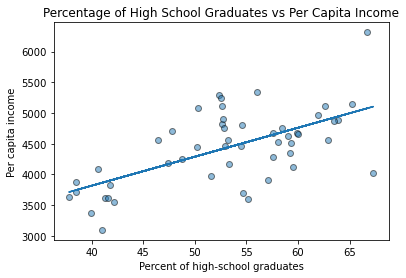

In [4]:
# Create a scttaer plot of HSGrad vs Income
a, b = np.polyfit(states_data.HSGrad, states_data.Income, 1)
grad_income = plt.scatter(states_data.HSGrad, states_data.Income, alpha = 0.5, edgecolor = 'black')
grad_income = plt.title('Percentage of High School Graduates vs Per Capita Income')
grad_income = plt.xlabel('Percent of high-school graduates')
grad_income = plt.ylabel('Per capita income')
plt.plot(states_data.HSGrad, a*states_data.HSGrad+b)  

The plot does confirm my hypothesis. The two variables have a positive correlation (The best fit line confirms this). As the percent of high-school graduates increases, the per capita income also increases.

    7. (3pt) Now let’s split the states into two groups: less-educated (HS gradutation rate less than median) and more-educated (HS above median).
    Hint: create such a variable and add it to the data frame.

In [5]:
# Create variable of the HSGrad column form the dataframe
HSGrad = states_data['HSGrad']
# Create variable for midian of high school graduation rate
HSGrad_median = HSGrad.median()
# Create an empty list 
Education_level = []
# A for loop that loops from 0 to the length of the HSGrad and add value to the empty list
for i in range(0, len(states_data['HSGrad'])):
    # if the graduate rate is higher than the median then it is more educated
    if HSGrad[i] >= HSGrad_median:
        Education_level.append('more-educated')
    # if the graduate rate is lower than the midian then it is less educated
    else:
        Education_level.append('less-educated')
# Add list to the original dataframe
states_data['Education_level'] = Education_level


    8. (4pt) Compute the mean income for both of these state groups. Does the result align well with the plot?
    Hint: you can use groupby

In [6]:
# Group by the education level and compute the mean of income
states_data.groupby('Education_level').Income.mean()

Education_level
less-educated    4269.88
more-educated    4601.72
Name: Income, dtype: float64

Overall, I think the results align well with the plot. 

Since the median high school graduation rate is 53.25%, roughly 53%, most of the incomes per capita above the 53% high school graduation rate have an income of 4500 or higher. It looks similar compared to the calculated mean for the more educated group (4601.72). However, it is noteworthy that some states with high school graduation rates larger than the median have income below 4000. The state with the highest percentage of high school graduation rate has a relatively low income per capita of roughly 4000. The state with the second-highest high school graduation rate has an income per capita of more than 6000, which is probably a value that has brought up the mean income per capita of more educated states.

The states that are less educated align well with the plot. Most of the states have income per capita under 4400 which lines up with the calculated mean for the less educated group: 4269.88.


    9. (3pt) Based on your analysis, what do you think: do states have higher income because of more education, or the other way around: better income states can afford more education? Explain your reasoning!    

Based on my analysis, I think better income states can afford more education. This is because some states with very high High school graduation rate has farely low per capita income. Especially, the state with the highest highschool graduation rate has an income per capita under the mean of the less-educated group. However, I cannot ignore that there seems to be a positive correlation in the graph. I think it begins with better income states can afford more education and more education generates higher income.

# Explore inequality (30pt)

## Descriptive analysis (10pt)

    1. (2pt) Load all three datasets and do basic sanity checks; remove missings values in the variable of interest—you only need the income (and citations and crater radius) variable below.


In [7]:
# Load the three datasets
treatment_data = pd.read_csv('/home/jovyan/PS/data/treatment.csv', sep='\t')
treatment_data = treatment_data['re78'].dropna()
citation_data = pd.read_csv('/home/jovyan/PS/data/mag-30k-citations.csv', sep='\t')
citation_data = citation_data['citations'].dropna()
lunar_data = pd.read_csv('/home/jovyan/PS/data/lunar-impact-craters_v08-2015-09.csv', sep='\t')
lunar_data = lunar_data['7. Radius [m]'].dropna()

    (a) How many cases do we have in each data file?

In [8]:
# Find the number of rows each data frame has
treatment_cases = treatment_data.shape[0]
citation_cases = citation_data.shape[0]
lunar_cases = lunar_data.shape[0]
print('Number of cases for treatment data file =', treatment_cases)
print('Number of cases for citation data file =', citation_cases)
print('Number of cases for lunar data file =', lunar_cases)

Number of cases for treatment data file = 2675
Number of cases for citation data file = 30000
Number of cases for lunar data file = 8716


    (b) Do the values of interest look reasonable?

In [9]:
# Print the min and max numbers of each data
print(treatment_data.min(), ',', treatment_data.max())
print(citation_data.min(), ',', citation_data.max())
print(lunar_data.min(), ',', lunar_data.max())

0.0 , 121174.0
0 , 7241
5 , 1250000


The values of interest look overall reasonable. It is a little suspecious that the number of times a paper is cited is 7241 because it seems incredibly large comapred to other values in the data. It is also suspicous to see the cater's radius is 1250000 because it is also incredibly large compared to other values in the data. Attention will be paid in the later parts of the analysis.

    2. (4pt) Show the distribution of all three data in a histogram. As the histogram may not look good, do it in two ways: a) histogram of income (or citations, or crater size) and b) histogram of log income. In order to avoid issues with log of zero you can do log(1 +income)instead of log income.
    As an extra challenge, try to figure out how to put 6 histograms in a single figure! (This is not necessary though.)

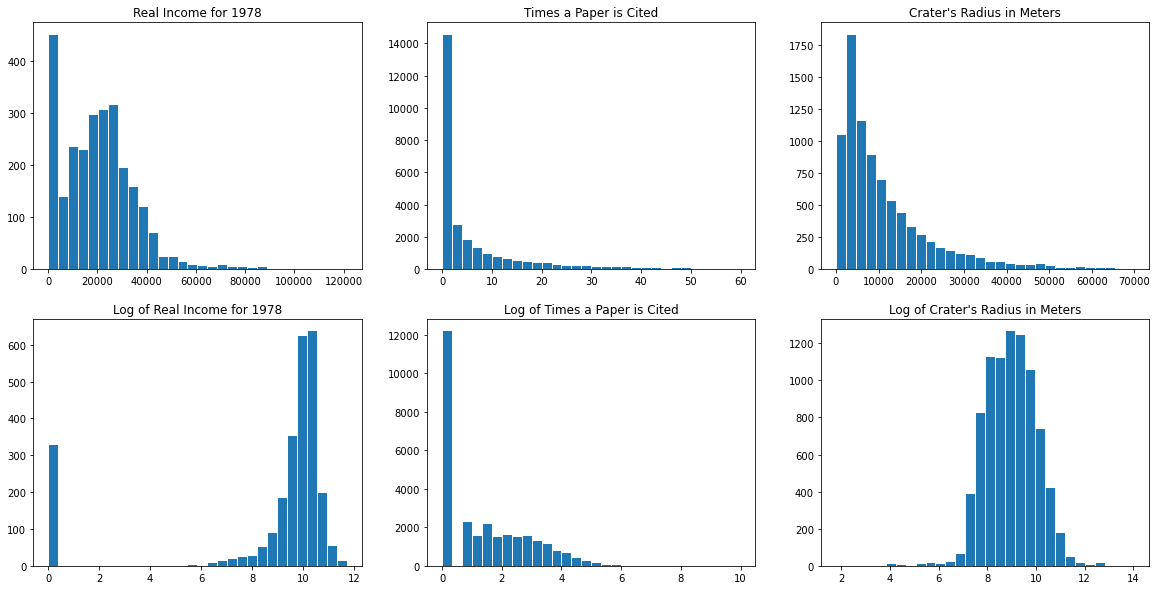

In [10]:
# Combine all six plots into one figure
fig, ax = plt.subplots(2, 3, figsize = (20, 10))
# Generates six plots that contain the normal and log value of the interested dataframe value 
ax[0, 0].hist(treatment_data, bins=30, edgecolor = 'w')
ax[0, 0].set_title('Real Income for 1978')
# Range is set to get a btter visualization 
ax[0, 1].hist(citation_data, bins = 30, edgecolor = 'w', range = (0, 60))
ax[0, 1].set_title('Times a Paper is Cited')
ax[0, 2].hist(lunar_data, bins = 30, edgecolor = 'w', range = (0, 70000))
ax[0, 2].set_title('Crater\'s Radius in Meters')
ax[1, 0].hist(np.log(1 + treatment_data), bins=30, edgecolor = 'w')
ax[1, 0].set_title('Log of Real Income for 1978')
ax[1, 1].hist(np.log(1 + citation_data), bins = 30, edgecolor = 'w', range = (0, 10))
ax[1, 1].set_title('Log of Times a Paper is Cited')
ax[1, 2].hist(np.log(1 + lunar_data), bins = 30, edgecolor = 'w')
ax[1, 2].set_title('Log of Crater\'s Radius in Meters')
plt.show()

    3. (2pt) Look at the histograms and tell-what do you think, which one describes the least unequal distribution, and which one the most unequal distribution?

After looking at the histograms, I think the one that describes the least uneuqal distribution is the log value of the Crater's Radius in Meters. The most unequal distribution is the times a paper is cited.

Note: Two of the six graphs (Citation and Crater's Radius) have been zoomed in and their outliers are not shown on the graphs. This is because the outliers caused poor visualizations of the graphs. Not a clear distribution pattern can be told from the graphs.

    4. (2pt) Compute sample mean and standard deviation for all three data. Compare these: how much smaller (or larger) is std. dev compared to the mean?

In [11]:
# Calculate the mean of the three data we are interested in 
treatment_mean = np.mean(treatment_data)
citation_mean = np.mean(citation_data)
lunar_mean = np.mean(lunar_data)
# Calculate the standard deviation of the three data we are interested in
treatment_std = np.std(treatment_data)
citation_std = np.std(citation_data)
lunar_std = np.std(lunar_data)
# Print conclusion statements
print('Sample mean of Real Income:', treatment_mean)
print('Sample mean of number of citations:', citation_mean)
print('Sample mean of crater\'s radius:', lunar_mean)
print('Standard deviation of real income:', treatment_std)
print('Standard deviation of number of citations:', citation_std)
print('Standard deviation of crater\'s radius:', lunar_std)
print('The standard deviation of real income is', treatment_mean - treatment_std, 'smaller than the mean.')
print('The standard deviation of number of citations is', citation_std - citation_mean, 'larger than the mean.')
print('The standard deviation of crater\'s radius is', lunar_std - lunar_mean, 'larger than the mean.')

Sample mean of Real Income: 20502.37607865417
Sample mean of number of citations: 15.605633333333333
Sample mean of crater's radius: 13711.492083524552
Standard deviation of real income: 15629.597534767552
Standard deviation of number of citations: 79.1767834759606
Standard deviation of crater's radius: 27503.965920210794
The standard deviation of real income is 4872.778543886619 smaller than the mean.
The standard deviation of number of citations is 63.571150142627275 larger than the mean.
The standard deviation of crater's radius is 13792.473836686242 larger than the mean.


Note: In this code chunk, the numpy std() function is called instead of the normal std() function. The use of two different standard deviation functions appears to provide slightly different results but does not change the general pattern.

## 80-20 ratio (20pt)

    One way to describe inequality is to compute the 20/80 ratio. As the famous example tells, 20% of people own 80% of resources. But what are the ratios in data here? Do we have that 10% of craters “own” 90% of “size”? (very unequal) Or maybe 49% of “papers” possess 49% of citations (very little inequality)? The analytic solution does not exist (afaik) though one can solve the ratio numerically. But we go a simpler way and use a loop to figure out an approximate number.

    1. (15pt) Compute the 20/80 ratio for all these three distributions. You can do it in a following way (but other solutions are ok too):
    (a) Compute the total income in your sample (i.e. sum of all values)
    (b) pick a quantile (say, upper 10%). Find the corresponding income threshold in the sample. You can use np.percentile, in this case it would be np.percentile(x,90) for the top-10 pct threshold (this is the same as lower 90th percentile, so thats why “90”).
    (c) Find the total income of the top-10 pct by just summing all income values that are larger than the threshold.
    (d) Compute the wealth share of the top-10 pct. Is this more than 90%? If yes then you should look at a smaller top percentage (e.g. 9pct). If not, look for a larger percentage (e.g 11pct).
    (e) In practice, you want to loop over top percentages (e.g. from 1% to 50%) and see where you get close to correct ratio.
    Hint: the answers are approximately 18, 30, 37

In [12]:
# Loop in reverse order to find the correct ratio for citation data.
for pct in range(99, 50, -1):
    threshold = np.percentile(citation_data, pct)
    num_citation = citation_data
    share = num_citation[num_citation > threshold].sum()/num_citation.sum()
    if 100 * share > pct:
        print(pct, share)
        break
top_percent = 100 - pct
print('The top', top_percent, 'owns', share * 100, 'percent of the number of citations.')

82 0.8325220166222027
The top 18 owns 83.25220166222027 percent of the number of citations.


In [13]:
# Loop in reverse order to find the correct ratio for lunar data.
for pct in range(99, 50, -1):
    threshold = np.percentile(lunar_data, pct)
    radius = lunar_data
    share = radius[radius > threshold].sum()/radius.sum()
    if 100 * share > pct:
        print(pct, share)
        break
top_percent = 100 - pct
print('The top', top_percent, 'owns', share * 100, 'percent of the crater\'s radius.')

70 0.7073570343211179
The top 30 owns 70.73570343211179 percent of the crater's radius.


In [14]:
# Loop in reverse order to find the correct ratio for income data.
for pct in range(99, 50, -1):
    threshold = np.percentile(treatment_data, pct)
    income = treatment_data
    share = income[income > threshold].sum()/income.sum()
    if 100 * share > pct:
        print(pct, share)
        break
top_percent = 100 - pct
print('The top', top_percent, 'owns', share * 100, 'percent of the income.')

63 0.6474562618876845
The top 37 owns 64.74562618876844 percent of the income.


    2. (5pt) Which distribution is the most unequal one? Which one the most equal one? Does this corresponds to what did you guess based on the visual impression based on the histograms?

Based on the results above, it appears that the most unequal one is the number of times a paper is cited as the top 18 owns 83.25220166222027 percent of the number of citations. The most equal one is the real income as the top 37 owns 64.74562618876844 percent of the income. This does not corresponds completely to what I guessed based on the visual impression based on the histograms. The most unequal one is correct but the least unequal one is income instead of log value of Crater's radius.

# Global temperature over time (40pt)

    1. (5pt) Are these variables of such a measure type that permit to ask/answer such a question?

The variables appear to be of a measure type that allows them to be compared. All the variables are numeric and thus can have calculations done on them, which means that they are of a type that allows comparison and math operations. The dataset should have no problem answering the two main questions we are interested in.

    2. (2pt) Load the data. Perform basic sanity checks.

In [15]:
# Load the dataframe
temperature_data = pd.read_csv('/home/jovyan/PS/data/UAH-lower-troposphere-wide.csv', sep='\t')
# Display the first five lines of the dataframe
temperature_data.head(5)

,year,month,globe,globe_land,globe_ocean,nh,nh_land,nh_ocean,sh,sh_land,...,soext_ocean,nopol,nopol_land,nopol_ocean,sopol,sopol_land,sopol_ocean,usa48,usa49,aust
0,1978,12,-0.48,-0.51,-0.47,-0.44,-0.46,-0.42,-0.52,-0.62,...,-0.45,-0.39,-0.68,-0.06,-0.45,-0.38,-0.49,-1.29,-1.15,-1.29
1,1979,1,-0.47,-0.64,-0.41,-0.64,-0.86,-0.50,-0.31,-0.13,...,-0.29,-0.46,-0.95,0.10,-0.16,-0.15,-0.16,-3.22,-2.42,0.92
2,1979,2,-0.43,-0.56,-0.39,-0.47,-0.57,-0.41,-0.39,-0.53,...,-0.36,-2.00,-2.30,-1.66,-0.80,-1.25,-0.58,-1.76,-1.84,-0.30
3,1979,3,-0.38,-0.51,-0.33,-0.46,-0.51,-0.44,-0.30,-0.53,...,-0.21,-0.56,-0.47,-0.65,-0.53,-1.25,-0.18,-0.70,-0.38,0.23
4,1979,4,-0.40,-0.57,-0.34,-0.47,-0.62,-0.37,-0.34,-0.46,...,-0.31,-0.84,-0.81,-0.87,-0.26,0.26,-0.51,-0.72,-0.46,-1.12


In [16]:
# Find the number of rows and columns
print(temperature_data.shape)
# Find the number of missing values in globe and year and month
print(temperature_data.year.isna().sum())
print(temperature_data.month.isna().sum())
print(temperature_data.globe.isna().sum())

(517, 29)
0
0
0


The dataframe looks reasonable after looking at the first several lines of data. The values seem to be in a consistent range. There should be no problem using this dataset for further analysis. The dataframe contains 517 rows and 29 columns. There are no missing values in the three interested values: globe, year, month.

    3. (5pt) Make a simple plot to address the first question–the temperature trend. Which variables do you want to plot? Comment the result: what, if anything, does the figure suggest?
    Hint: you may want to create a variable for time along the lines time =year +month/12

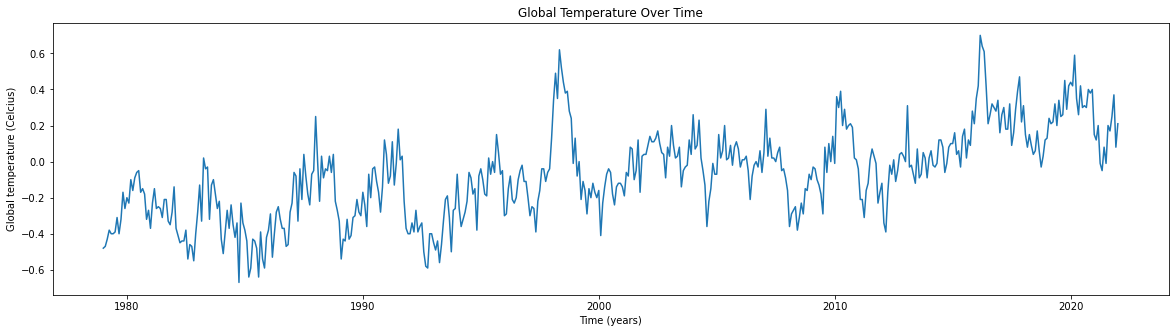

In [17]:
# Create a time variable
time = temperature_data.year + temperature_data.month / 12
# Create a plot that shows the global temperature over time
temperature_over_time = plt.rcParams["figure.figsize"] = (20, 5)
temperature_over_time = plt.plot(time, temperature_data.globe)
temperature_over_time = plt.xlabel('Time (years)')
temperature_over_time = plt.ylabel('Global temperature (Celcius)')
temperature_over_time = plt.title('Global Temperature Over Time')

I decided to plot the variables globe and time. The plot shows the globe temperature over time. Overall, the global temperature appears to increase as the year increases. There appears to be some sharp increases at the end of the last century and after 2015. Besides these two sharp increases, the plot suggests that the global temperature increase consistently over time.

    4. (6pt) However, for each month we have a single global temperature reading only so we cannot compute the monthly variance across the globe. Instead, let’s compute yearly variance, variance of global temperature over months for each year, and make a plot where years are on the horizontal axis and temperature variance on the vertical axis.
    Hint: use groupby by years.

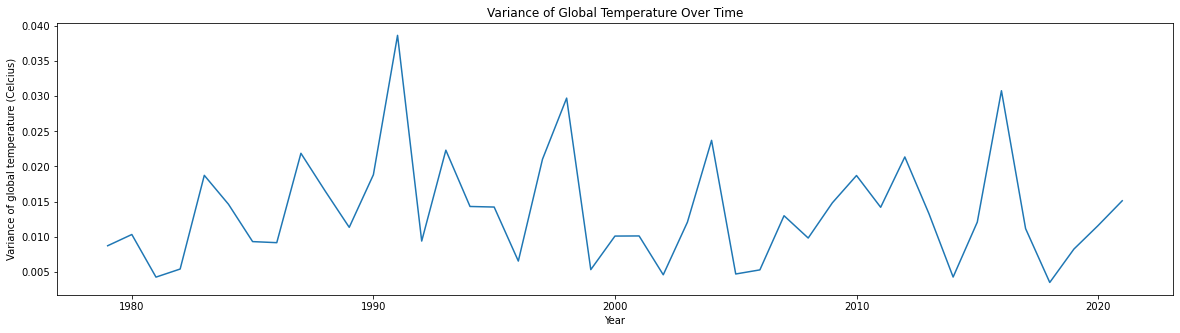

In [18]:
# Calculate the yearly variance of temperature
temperature_variance = temperature_data.groupby('year').globe.var()
unique_year = np.unique(temperature_data.year)
# Create a plot that shows th variance of global temperature over time
global_var_year = plt.plot(unique_year, temperature_variance)
global_var_year = plt.xlabel('Year')
global_var_year = plt.ylabel('Variance of global temperature (Celcius)')
global_var_year = plt.title('Variance of Global Temperature Over Time')

    5. (5pt) In order to be consistent, let’s do the same with temperature: compute yearly temperature and repeat the plot with yearly averages. But what is “yearly temperature”? Do you prefer yearly mean temperature? Or perhaps yearly median? Discuss the advantages/disadvantages of these measures and pick an appropriate measure. You may also display both.
    Hint: Lecture notes Section 1.2.2 “Describing data” discusses mean and median.

In [19]:
# Calculate the yearly mean and yearly median of global temperature
yearly_mean = temperature_data.groupby('year').globe.mean()
yearly_median = temperature_data.groupby('year').globe.median()

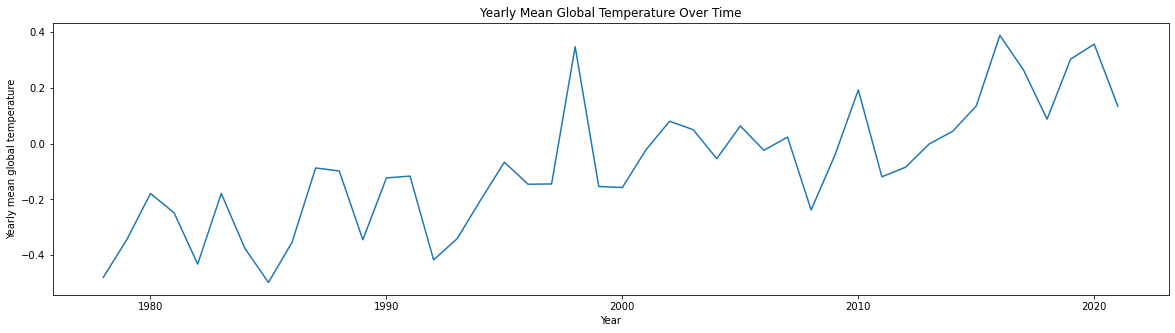

In [20]:
# Create a graph that shows yearly mean global temperature over time
yearly_mean_plot = plt.plot(unique_year, yearly_mean)
yearly_mean_plot = plt.xlabel('Year')
yearly_mean_plot = plt.ylabel('Yearly mean global temperature')
yearly_mean_plot = plt.title('Yearly Mean Global Temperature Over Time')

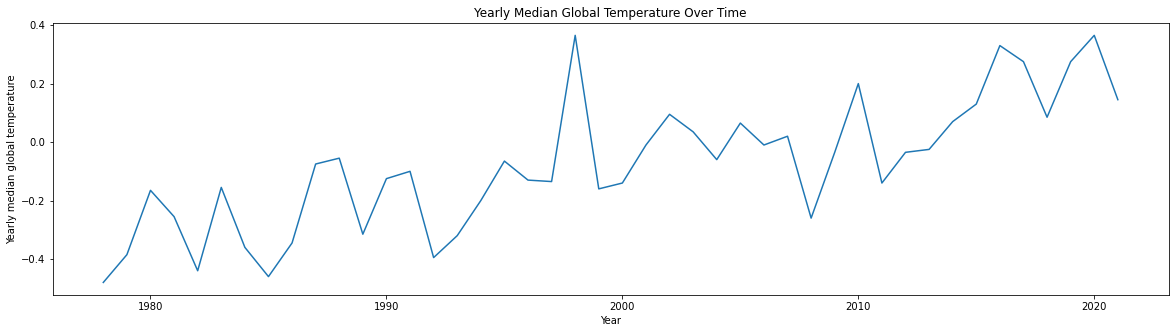

In [21]:
# Create a graph that shows yearly median global temperature over time
yearly_median_plot = plt.plot(unique_year, yearly_median)
yearly_median_plot = plt.xlabel('Year')
yearly_median_plot = plt.ylabel('Yearly median global temperature')
yearly_median_plot = plt.title('Yearly Median Global Temperature Over Time')

The advantage of mean is that it is easy and intuitive. The disadvantage of mean is that it is sensitive to outliers and cannot handle missing values. The advantage of the median is that it is easy and intuitive and may not be closer to the typical value, and it is not sensitive to outliers and can handle missing values sometimes. The disadvantage of the median is that it is more robust. In this case, based on the graphs and sanity check, there is no clear difference between the two, and there are no missing values or apparent outliers. I prefer using the mean since the mean is more intuitive, and yearly means are often displayed elsewhere.

    6. (6pt) Finally, let’s also make similar plots using decades instead of years.
    Hint: create a decade variable using year and integer division //.

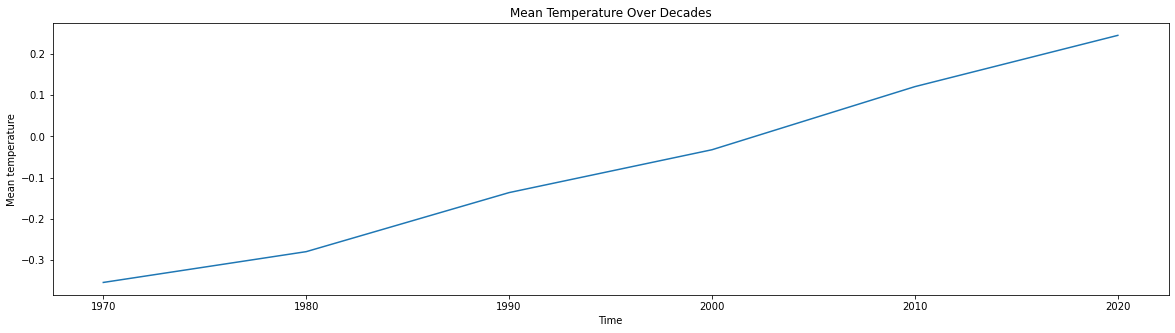

In [22]:
# Create a variable that put years into decades
decades = (temperature_data.year // 10)*10
# Create another column in the dataframe called decades
temperature_data['decades'] = decades
# Calculate the decadal mean temperature
decade_temp_mean = temperature_data.groupby('decades').globe.mean()
# PLot the graph of mean temperature over decades
mean_temp_decade = plt.plot(np.unique(decades), decade_temp_mean)
mean_temp_decade = plt.xlabel('Time')
mean_temp_decade = plt.ylabel('Mean temperature')
mean_temp_decade = plt.title('Mean Temperature Over Decades')

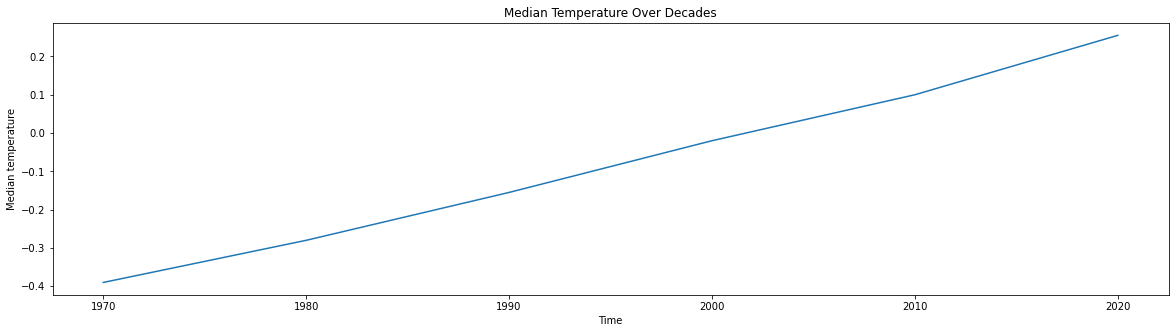

In [23]:
# Calculate the decadal median temperature
decade_temp_median = temperature_data.groupby('decades').globe.median()
# Plot the median temperature over decades
mean_temp_decade = plt.plot(np.unique(decades), decade_temp_median)
mean_temp_decade = plt.xlabel('Time')
mean_temp_decade = plt.ylabel('Median temperature')
mean_temp_decade = plt.title('Median Temperature Over Decades')

    7. (5pt) In your decadal plot: what do you think about data quality for 1970s and 2020s?
    Hint: how many observations are there?

In [24]:
print('Number of values in 1970s:', len(temperature_data[temperature_data['decades'] == 1970]))
print('Number of values in 2020s:', len(temperature_data[temperature_data['decades'] == 2020]))
print('Number of values each decade besides 1970s and 2020s:', len(temperature_data[temperature_data['decades'] == 2000]))

Number of values in 1970s: 13
Number of values in 2020s: 24
Number of values each decade besides 1970s and 2020s: 120


The quality for 1970s and 2020s is poor. This is because there are only 13 observations for 1970s and 24 observations for 2020s. This indicates that there is not enough data to find a more accurate mean and median for 1970s and 2020s.

    8. (6pt) Discuss all your plots and state your conclusions: do you see any temperature trend? Do you see any trend in temporal variability? Which plots do you think illustrate your claims in the best way?

All the plots except for the variance of the global temperature seem to suggest that as time increases, the global temperature also increases. From the plot of temporal variability, there is no clear trend. I think the mean temperature over decades illustrate my claim of "as time increases, the global temperature also increases". From the graph, we can see clearly that a line that is increasing over time. There is only one plot for variability, so the map that best illustrate my claim about temporal variability is the variance of global temperature over time.

I spent about 10 hours on this problem set. I was mostly confused by the wording of some questions.